In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\piotr\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Feb 20 22:22:05 2025).


In [8]:
df.job_title_short.groupby(by=df.job_title_short).count().sort_values(ascending=False)

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: job_title_short, dtype: int64

In [7]:
df.pivot_table(index='job_title_short',aggfunc='size').sort_values(ascending=False)

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
dtype: int64

In [13]:
df.pivot_table(values='salary_year_avg',index='job_title_short',aggfunc='median').sort_values(by='salary_year_avg',ascending=False)


,salary_year_avg
job_title_short,
Senior Data Scientist,155500.0
Senior Data Engineer,147500.0
Data Scientist,127500.0
Data Engineer,125000.0
Senior Data Analyst,111175.0
Machine Learning Engineer,106415.0
Software Engineer,99150.0
Cloud Engineer,90000.0
Data Analyst,90000.0


In [ ]:
df.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending=False)

job_title_short
Senior Data Scientist        155500.0
Senior Data Engineer         147500.0
Data Scientist               127500.0
Data Engineer                125000.0
Senior Data Analyst          111175.0
Machine Learning Engineer    106415.0
Software Engineer             99150.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Business Analyst              85000.0
Name: salary_year_avg, dtype: float64

In [22]:
countries = df['job_country'].value_counts().sort_values(ascending=False).head(6).index

In [25]:
countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [42]:
df_job_country_salary = df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median').filter(items=countries, axis=0)
df_job_country_salary = df_job_country_salary.loc[countries]
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [43]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

In [53]:
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


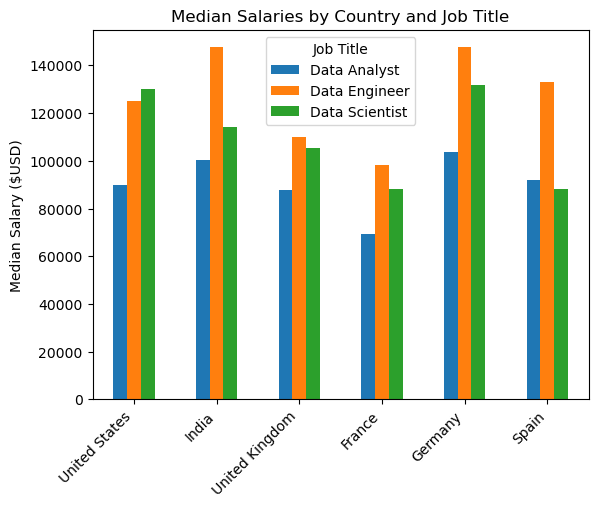

In [52]:
df_job_country_salary.plot(kind='bar') 
plt.title("Median Salaries by Country and Job Title")
plt.ylabel("Median Salary ($USD)")
plt.xlabel("")
plt.legend(title='Job Title')
plt.xticks(rotation=45, ha="right")
plt.show()